In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=10,resize=1)
#选取样本量量更多的那些人脸，这样会方便训练


Total dataset size:
n_samples: 4324
n_features: 11750
n_classes: 158
类别分布: Counter({np.int64(35): 530, np.int64(23): 236, np.int64(149): 144, np.int64(29): 121, np.int64(36): 109, np.int64(11): 77, np.int64(49): 71, np.int64(85): 60, np.int64(61): 55, np.int64(73): 53, np.int64(54): 52, np.int64(134): 52, np.int64(153): 49, np.int64(95): 48, np.int64(37): 44, np.int64(65): 42, np.int64(12): 42, np.int64(91): 41, np.int64(93): 41, np.int64(44): 39, np.int64(2): 39, np.int64(110): 37, np.int64(5): 36, np.int64(3): 35, np.int64(137): 33, np.int64(99): 33, np.int64(146): 33, np.int64(152): 32, np.int64(89): 32, np.int64(129): 32, np.int64(77): 31, np.int64(25): 31, np.int64(122): 30, np.int64(41): 30, np.int64(14): 29, np.int64(97): 29, np.int64(52): 28, np.int64(82): 28, np.int64(124): 27, np.int64(131): 26, np.int64(40): 26, np.int64(144): 25, np.int64(13): 24, np.int64(156): 24, np.int64(68): 24, np.int64(81): 23, np.int64(141): 23, np.int64(132): 23, np.int64(92): 22, np.int64(34): 22,

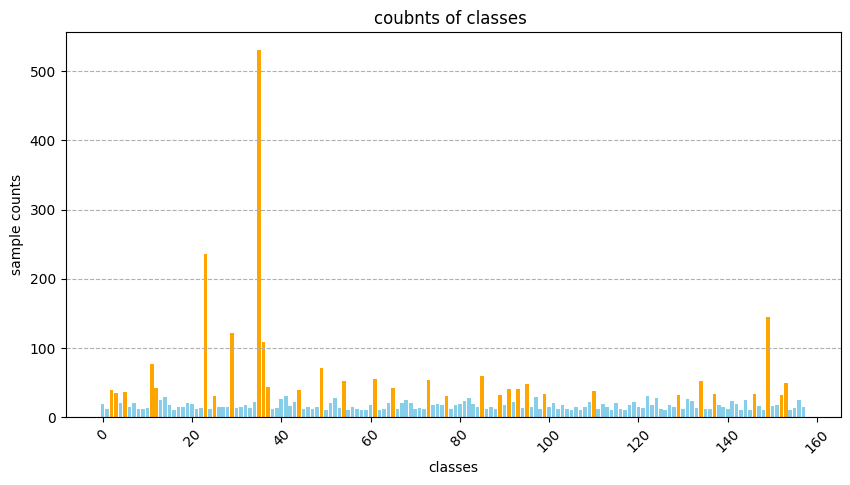

In [5]:
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)
class_counts = Counter(lfw_people.target)

print("类别分布:", class_counts)
rare_classes = {cls: count for cls, count in class_counts.items() if 10 <= count <= 30}
ma_classes = {cls: count for cls, count in class_counts.items() if count > 30}
print("样本量在10-30之间的类别及数量:")
for cls, count in rare_classes.items():
    print(f"类别 {target_names[cls]}: {count} 个样本")
print("样本量大于30的类别及数量:")
for cls, count in ma_classes.items():
    print(f"类别 {target_names[cls]}: {count} 个样本")


# 提取类别和样本数
rclasses = list(rare_classes.keys())
rcounts = list(rare_classes.values())
mclasses= list(ma_classes.keys())
mcounts = list(ma_classes.values())

# 绘制条形图
plt.figure(figsize=(10, 5))
plt.bar(rclasses, rcounts, color='skyblue')
plt.bar(mclasses, mcounts, color='orange')

plt.xlabel("classes")
plt.ylabel("sample counts")
plt.title("coubnts of classes ")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

In [6]:
X_rare,y_rare,X_rare_train,y_rare_train,X_rare_test,y_rare_test = [],[],[],[],[],[]
X_ma,y_ma,X_ma_train,y_ma_train,X_ma_test,y_ma_test = [],[],[],[],[],[]
#rare_classes = {cls: count for cls, count in class_counts.items() if 10 <= count <= 30}
for cls in rclasses:
    cls_id=np.where(lfw_people.target==cls)[0]
    X_rare.append(lfw_people.data[cls_id])
    y_rare.append(lfw_people.target[cls_id])

X_rare = np.concatenate(X_rare)
y_rare = np.concatenate(y_rare)
X_rare_train, X_rare_test, y_rare_train, y_rare_test = train_test_split(X_rare, y_rare, test_size=0.25)
#ma_classes = {cls: count for cls, count in class_counts.items() if count > 30}
for cls in mclasses:
    cls_id=np.where(lfw_people.target==cls)[0]
    X_ma.append(lfw_people.data[cls_id])
    y_ma.append(lfw_people.target[cls_id])

X_ma = np.concatenate(X_ma)
y_ma = np.concatenate(y_ma)    
X_ma_train, X_ma_test, y_ma_train, y_ma_test = train_test_split(X_ma, y_ma, test_size=0.25)

print("Rare classes train and test sets:")
print("X_rare shape:", X_rare.shape)
print("y_rare shape:", y_rare.shape)
print("X_ma shape:", X_ma.shape)
print("y_ma shape:", y_ma.shape)
print("X_rare_train shape:", X_rare_train.shape)
print("Unique classes in y_rare_train:", len(np.unique(y_rare_train)))
print("X_ma_train shape:", X_ma_train.shape)
print("Unique classes in y_ma_train:", len(np.unique(y_ma_train)))
print("X_rare_test shape:", X_rare_test.shape)
print("Unique classes in y_rare_test:", len(np.unique(y_rare_test)))
print("X_ma_test shape:", X_ma_test.shape)
print("Unique classes in y_ma_test:", len(np.unique(y_ma_test)))
print("Length of target_names:", len(lfw_people.target_names))

Rare classes train and test sets:
X_rare shape: (2014, 11750)
y_rare shape: (2014,)
X_ma shape: (2310, 11750)
y_ma shape: (2310,)
X_rare_train shape: (1510, 11750)
Unique classes in y_rare_train: 126
X_ma_train shape: (1732, 11750)
Unique classes in y_ma_train: 32
X_rare_test shape: (504, 11750)
Unique classes in y_rare_test: 123
X_ma_test shape: (578, 11750)
Unique classes in y_ma_test: 32
Length of target_names: 158


In [13]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.base import BaseEstimator, ClassifierMixin

class ProtoClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, embedding_model):
        # embedding_model: 任意预训练特征提取器，需实现 transform(X)
        self.embedding_model = embedding_model

    def fit(self, X, y):
        # 计算训练样本的嵌入，并对每个类别计算原型（均值向量）
        X_emb = self.embedding_model.transform(X)
        self.classes_ = np.unique(y)
        # 原型列表，按 classes_ 顺序排列
        self.prototypes_ = np.vstack([
            X_emb[y == c].mean(axis=0) for c in self.classes_
        ])
        return self

    def predict(self, X):
        # 对测试样本计算嵌入
        X_emb = self.embedding_model.transform(X)
        # 计算每个样本到各类别原型的欧氏距离，并取最小值索引
        dists = cdist(X_emb, self.prototypes_, metric='euclidean')
        idx = np.argmin(dists, axis=1)
        return self.classes_[idx]


In [ ]:
# 假设你已经做了 PCA，并得到了如下数据
# X_rare_train_pca, y_rare_train, X_rare_test_pca, y_rare_test

prototypes = compute_prototypes(X_rare_train, y_rare_train)
y_pred_proto = predict_prototypical(X_rare_test, prototypes)

# 打印分类报告
from sklearn.metrics import accuracy_score
print("Prototypical Network accuracy on X_rare:", accuracy_score(y_rare_test, y_pred_proto))
print(classification_report(y_rare_test, y_pred_proto, zero_division=0))


Prototypical Network accuracy on X_rare: 0.1488095238095238
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         2
           4       0.33      0.25      0.29         4
           6       0.17      0.25      0.20         4
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         2
          10       0.50      0.33      0.40         3
          13       0.09      0.11      0.10         9
          14       0.00      0.00      0.00        10
          15       1.00      0.17      0.29         6
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         5
          18       0.50      0.33      0.40         3
          19       0.00      0.00      0.00         5
          20       0.00      0.00      0.00         7
          21       0.

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.base import TransformerMixin

# 示例恒等转换器（未对输入做变换）
class IdentityTransformer(TransformerMixin):
    def fit(self, X, y=None): return self
    def transform(self, X): return X

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=50)),
    ('proto', ProtoClassifier(embedding_model=IdentityTransformer()))
])
# 训练并预测
pipeline.fit(X_rare_train, y_rare_train)
y_pred = pipeline.predict(X_rare_test)
# 打印分类报告
print("Pipeline accuracy on X_rare:", accuracy_score(y_rare_test, y_pred))
print(classification_report(y_rare_test, y_pred, zero_division=0))


Pipeline accuracy on X_rare: 0.1388888888888889
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         2
           4       0.25      0.25      0.25         4
           6       0.25      0.25      0.25         4
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         2
          10       0.50      0.33      0.40         3
          13       0.30      0.33      0.32         9
          14       0.00      0.00      0.00        10
          15       1.00      0.17      0.29         6
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         5
          18       1.00      0.33      0.50         3
          19       0.00      0.00      0.00         5
          20       0.00      0.00      0.00         7
          21       0.00      0.00

In [ ]:

def make_param_grid(center, c_radius, g_radius, num_points=5):
    c_values = np.logspace(np.log10(center['C'] / c_radius), np.log10(center['C'] * c_radius), num=num_points)
    g_values = np.logspace(np.log10(center['gamma'] / g_radius), np.log10(center['gamma'] * g_radius), num=num_points)
    return {
        'C': list(c_values),
        'gamma': list(g_values),
        'kernel': ['rbf']
    }

# 初始参数范围
init_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.0001, 0.001, 0.01, 1],
    'kernel': ['rbf']
}

variance_thresholds = np.linspace(0.86, 0.90, 5)
optimized_results = {
    'n_components': [],
    'variance_threshold': [],
    'best_accuracy': [],
    'best_params': []
}

best_params = {}

for threshold in variance_thresholds:
    print(f"\n=== Variance Threshold: {threshold:.2f} ===")

    # Step 1: PCA 降维
    pca_full = PCA().fit(X_ma_train)
    cumulative_var = np.cumsum(pca_full.explained_variance_ratio_)
    n_components = np.argmax(cumulative_var >= threshold) + 1
    pca = PCA(n_components=n_components, whiten=True)
    X_train_pca = pca.fit_transform(X_ma_train)
    X_test_pca = pca.transform(X_ma_test)
    best_score = -np.inf
 

    for round_idx in range(3):  # ⬅️ 3轮 grid 自适应收缩搜索
        print(f"\n  >> Grid Round {round_idx + 1}")

        if round_idx == 0:
            param_grid = init_param_grid
        else:
            param_grid = make_param_grid(
                best_params[threshold],
                c_radius=2,      # 每轮缩放范围
                g_radius=5,
                num_points=5     # 每轮只取 5 个点
            )

        grid_search = GridSearchCV(
            SVC(class_weight='balanced'),
            param_grid=param_grid,
            cv=KFold(n_splits=5, shuffle=True, random_state=42),
            scoring='accuracy',
            n_jobs=-1,
            verbose=0
        )
        grid_search.fit(X_train_pca, y_ma_train)

        if grid_search.best_score_ > best_score:
            best_score = grid_search.best_score_
            best_params[threshold] = grid_search.best_params_

        print(f"    Best params: {grid_search.best_params_} (CV score={grid_search.best_score_:.4f})")

    # Step 2: 测试集评估
    final_model = SVC(class_weight='balanced', **best_params[threshold])
    final_model.fit(X_train_pca, y_ma_train)
    y_pred = final_model.predict(X_test_pca)
    test_acc = accuracy_score(y_ma_test, y_pred)

    print(f"===> Final test acc: {test_acc:.4f} with {n_components} components")

    # Step 3: 记录
    optimized_results['n_components'].append(n_components)
    optimized_results['variance_threshold'].append(threshold)
    optimized_results['best_accuracy'].append(test_acc)
    optimized_results['best_params'].append(best_params)

# 可视化
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(optimized_results['variance_threshold'], optimized_results['best_accuracy'], 'o-', label='Test Accuracy')
plt.xlabel("Variance Threshold")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs Variance Threshold")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(optimized_results['variance_threshold'], optimized_results['n_components'], 's-', color='orange', label='n_components')
plt.xlabel("Variance Threshold")
plt.ylabel("Number of Components")
plt.title("PCA Components vs Variance Threshold")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# 打印最优结果
best_idx = np.argmax(optimized_results['best_accuracy'])
print(f"\n=== Round{i}最优结果 ===")
print(f"Variance threshold: {optimized_results['variance_threshold'][best_idx]:.2f}")
print(f"n_components: {optimized_results['n_components'][best_idx]}")
print(f"Best test accuracy: {optimized_results['best_accuracy'][best_idx]:.4f}")
print(f"Best parameters: {optimized_results['best_params'][best_idx]}")

print ("=== 结束 ===")
print ("Best test accuracy:", optimized_results['best_accuracy'])
print ("Best parameters:", optimized_results['best_params'])